<a href="https://colab.research.google.com/github/Saicharan-007/Linear-Regression-From-Scratch/blob/main/Linear_Regression_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('Advertising.csv',index_col='Unnamed: 0')
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


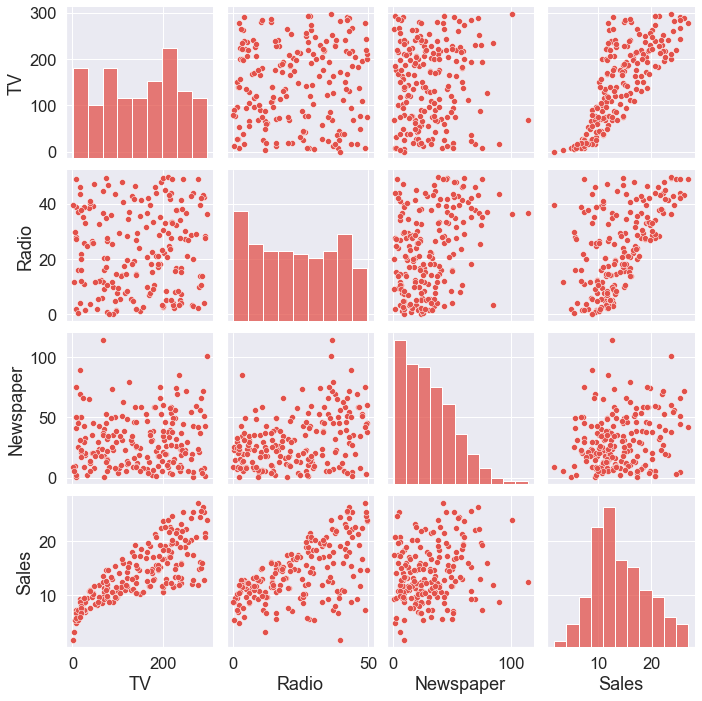

In [ ]:
p=sns.pairplot(data)

1) Linearity

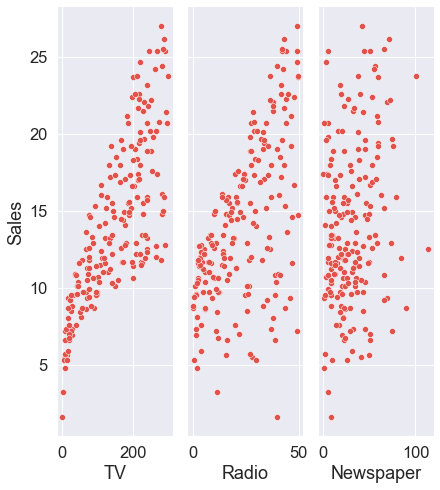

In [ ]:
p=sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.3)
               

In [ ]:
x=data.drop(['Sales'],axis=1)
y=data['Sales']

In [ ]:
class StandardScaler(object):
    def __init__(self):
        pass
    def fit(self,X):
        self.mean=np.mean(X,axis=0)
        self.scale=np.std(X-self.mean,axis=0)
        return self
    def transform(self,X):
        return (X-self.mean)/self.std
    def fit_transform(self,X):
        return self.fit(X)-transform(X)

In [ ]:
sc=StandardScaler()
X=sc.fit_transform(x)
X


array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [ ]:
def train_test_split_(*arrays,test_size=None,train_size=None,random_state=None):
    length=len(arrays[0])
    if random_state:
        np.random.seed(random_state)
    p=np.random.permutation(length)
    if type(test_size)==int:
        index=length-test_size
    elif type(test_size)==float:
        index=length-np.ceil(length*test_size)
    else:
        if type(train_size)==int:
            index=train_size
        elif type(train_size)==float:
            index=int(length*train_size)
        else:
            index=length-np.ceil(length*0.25)
    return [b for a in arrays for b in (a[p][:index],a[p][index:])]
        

    

In [ ]:
X_train,X_test,y_train,y_test=train_test_split_(x,y,test_size=0,train_size=0.25)

KeyError: "None of [Int64Index([110, 198,  19, 147, 181, 131, 166, 170, 103, 164,\n            ...\n             61,  88,  97,  23, 149,  50, 109, 197,  52,  71],\n           dtype='int64', length=200)] are in the [columns]"